# Ejemplo: Flecha y cojinete

Una flecha será embonada en un cojinete como se muestra a continuación

<img src="https://github.com/Medetl/Simulacion/blob/main/Unidad%20II/cojinete.png?raw=1">

Si $x_1$ sigue una distribución normal con media $1.5$ y varianza $0.0016$, y $x_2$ esta misma distribución con media $1.48$ y varianza $0.0009$, determine:

a) La probabilidad de que haya interferencia.

b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de $0.01$, con un nivel de seguridad del $95\%.$

Vamos a resolver este problema, procurando seguir la metodología vista en el curso.

### 1. Identifique las variables

Tenemos dos: $x_1$ y $x_2$.

### 2 y 3. Determine la distribución de probabilidad y modele las variables aleatorias

En el planteamiento ya se especifica que $x_1 \sim N(1.5, 0.04)$ y que $x_1 \sim N(1.48, 0.03)$.

### 4. Defina el modelo del sistema y los objetivos de la simulación

La diferencia $x_1 - x_2$ modela adecuadamente el sistema.

Si $x_2 - x_1 > 0$ el diametro de la flecha es más grande que el espacio en el cojinte y, por tanto, hay interferencia. De lo contrario, las piezas embonan sin problema.

Objetivo: determinar la frecuencia con que esto ocurre, lo cual nos da una esrimación de la probabilidad de interefrencia.

Una forma de implementarlo es mediante el siguiente código.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
def interferencia():                #Esta función devuelve el valor 1 si hay interferencia o 0 si no la hay.
    interf=0
    x_1 = random.gauss(1.50,0.04)    #La funcion gauss genera un número que sigue una distribucion normal con
    x_2 = random.gauss(1.48,0.03)   # la media y la desvicion estandar especificados.
    if 0.0 < x_2 - x_1:
        interf += 1
    return interf

In [8]:
interferencia()

0

### 5. Diseñe el experimento

Para estimar la probabilidad de interferencia, ejecutamos $n$ veces la función anterior y calculamos de manera acumulativa
la probabilidad de interferencia.

In [9]:
def prob_inter(n):
    prob = []                       # Esta funcion devuelve esta lista "prob", con los valores de la probabilidad
    inter = 0                       # estimada al contar las veces que hay interferencia y dividir entre las veces que
    for i in range(n):              # se ha reptido la observacion mientras aumenta el numero de iteraciones.
        inter += interferencia()
        prob.append(inter/(i+1))
    return prob

In [10]:
X = prob_inter(500)                # Asignamos valores a n y realizamos el experimento

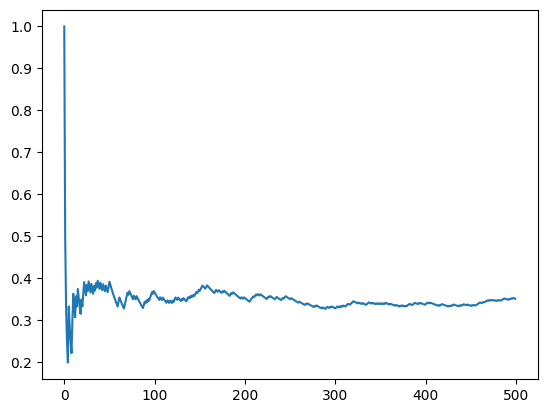

In [11]:
plt.plot(X)                         # La gráfica muestra que la convergencia está garantizada con 500 iteraciones
                                    # Sin embargo, diferentes ejecuciones darán resultados distintos

In [12]:
print(np.mean(X), np.std(X))

0.34924229256725664 0.034940720304129404


### 6. Repita el experimento $n$ veces

Una forma de hacerlo es mediante el siguiente codigo.

In [13]:
def modelo(n):
    lista=[]
    for i in range(n):
        s = prob_inter(500)
        lista.append(np.mean(s))
    return lista

In [14]:
Y=modelo(120) #el número de experimentos es menor al número de simulaciones

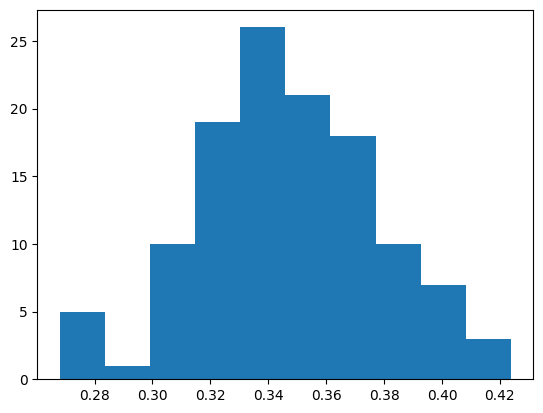

In [15]:
plt.hist(Y)
plt.show()

In [16]:
print(np.mean(Y), np.std(Y))

0.34694627545502005 0.03146235235202564


### Paso 7. Hallamos el intervalo de confianza.

$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

In [17]:
np.mean(Y)

0.34694627545502005

In [18]:
np.mean(Y) - 1.96*np.std(Y)/np.sqrt(50), np.mean(Y) + 1.96*np.std(Y)/np.sqrt(50)

(0.3382253563165425, 0.3556671945934976)

Es conveniente estandarizar $\bar X$ e incluir de manera formal la variable aleatoria normal estándar $Z$ donde
$$Z=\frac{\bar X-\mu}{\sigma/\sqrt{n}}$$
Sabemos que $bajo\ H_0$ es decir $\mu=\mu_0$, entonces $\sqrt{n}(\bar X - \mu_0)/\sigma$ tiene una distribución $n(x; 0,1)$ y por lo tanto la expresión
$$P(-z_{\alpha/2} < \frac{\bar x-\mu_0}{\sigma/\sqrt{n}} < z_{\alpha/2})=1-\alpha$$
se puede utilizar para escribir una región de no rechazo adecuada.


La estimación del intervalo de confianza incluye el cálculo de límites dentro de los cuales es "razonable" que resida el parámetro en cuestión.
La estimación del intervalo de confianza se basa en la variable aleatoria
$$Z=\frac{x-\mu}{\sigma/\sqrt{n}}$$
Resulta que la prueba de $H_0:\mu=\mu_0$ contra $H_1:\mu\neq\mu_0$ a un nivel de significancia $α$ es equivalente a calcular un intervalo de confianza del $100(1-\alpha)\%$ sobre $\mu$ y rechazar $H_0$, si $\mu_0$ está fuera del intervalo de confianza.
\
Si $\mu_0$ está adentro del intervalo de confianza, no se rechaza la hipótesis.
\
Recordar que con un valor observado $\bar x$, no rechazar $H_0$ a un nivel de insignificancia $\alpha$ implica que
$$-z_{\alpha/2} < \frac{\bar x-\mu_0}{\sigma/\sqrt{n}} < z_{\alpha/2}$$
Que es equivalente a
$$\bar{x}-z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{\sigma}{\sqrt{n}}$$
\
La equivalencia de la estimación del intervalo de confianza con la prueba de hippótesis se extiende a las diferencias entre dos medias varianzas, cocientes de varianzas, etc.

### Para determinar el número de simulaciones

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

In [19]:
N = (2*np.std(X)*1.96/0.01)**2

In [20]:
print(N)

187.6012991249109


### Podemos comparar con la **solución analítica** del problema.

Para ello usamos el **teorema de resta de dos variables aleatorias normales**.

Si $X$ y $Y$ son variables aleatorias independientes y normalmente distribuidas, es decir\
$$X\sim N(\mu_X,\sigma_X)$$
entonces la diferencia $X-Y$ también está normalmente distribuida.
$$Z\sim N(\mu_X-\mu_Y,\sigma^2_X+\sigma^2_Y)$$
\
Tenemos:\
$$x_1\sim N(1.5,0.04)$$
$$x_2\sim N(1.48,0.03)$$

Queremos saber la probabilidad de interferencia. Hay interferencia cuando el diámetro de la flecha es más grande que el cojinete, es decir: $$x_2>x_1$$
$$x_2-x_1>0$$

$x_2$ y $x_1$ son variables aleatorias independientes y normalmente distribuidas, su diferencia resulta:
$$x_3\sim N(\mu_{x2}-\mu_{x1},\sigma^2_{x2}+\sigma^2_{x1})$$
\
$$\mu_{x2}-\mu_{x1}=1.48-1.50=-0.02=\mu_3$$
$$\sqrt{\sigma^2_{x1}+\sigma^2_{x2}}=\sqrt{0.03^2+0.04^2}=0.05=\sigma_3$$
\
$$x_3\sim N(-0.02,0.05)$$
$x_3$ es una variable aleatoria normal $z$ con media $-0.02$ y varianza $0.05^2$.
\
Así
$$P(interferencia)=P(x_2-x_1>0)=P(x_3>0)$$
Hacemos la transformación en Z
$$Z=\frac{X-\mu}{\sigma}$$
$$Z=\frac{0-(-0.02)}{0.05}=0.04$$
\
$$P(Z>0.4)=\phi(0.4)$$
El valor de $\phi(0.4)$ lo sacamos de la tabla de áreas bajo la curva normal.
Entonces
$$P(x_3>0)=1-\phi(0.4)$$
$$1-0.6554=0.3446$$
Es decir, el valor $\phi(0.4)$ deja un área de $0.6554$ a la derecha, entonces a la izquierda deja un área de $0.3446$. En conclusión
$$P(Interferencia)=0.3446=34.46\%$$


In [5]:
norm.cdf(-0.04, -0.02, 0.05)

0.3445782583896758

La funcion norm.cdf devuelve el valor de la función acumulativa en el punto especificado, lo que representa la probabilidad de que una variable aleatoria normal sea menor o igual a ese punto.
\
En este caso $x_3$ con media $-0.02$ y desviación estándar $0.05$ sea menor o igual a $-0.04$

In [22]:
norm.cdf(-0.04, -0.02, 0.05)-np.mean(Y) #Resta la probabilidades
                                        #por norm.cdf - simulación.

-0.00236801706534423